## 8.1.1

In [1]:
import numpy as np
from scipy.spatial.distance import cdist

# Set parameters
n1 = 25
n2 = 20

# Generate X 
X = np.array([(i, j) for i in range(n1) for j in range(n2)])

# Verify the shape of X
print("Shape of X:", X.shape)  #  (500, 2)

# Compute the matrix D of squared Euclidean distances
D = cdist(X, X, 'sqeuclidean')

# Verify the shape of D
print("Shape of D:", D.shape)  # (500, 500)

Shape of X: (500, 2)
Shape of D: (500, 500)


## 8.1.2


In [2]:
c = np.array([(i / (n1 - 1) * 255, j / (n2 - 1) * 255, (i + j) / (n1 + n2 - 2) * 255) for i in range(n1) for j in range(n2)])
c = c.astype(int)  # Ensure the color values are integers

# Verify the shape of c
print("Shape of c:", c.shape)  #  (500, 3)

Shape of c: (500, 3)


## 8.1.3

In [4]:

import scipy.linalg

# Set the length scale parameter
eps = 1

# Compute the matrix A
A = np.exp(-D / eps**2)

# Set the diagonal of A to 0
np.fill_diagonal(A, 0)

# Compute the degree matrix D
degree_matrix = np.diag(A.sum(axis=1))

# Compute the Laplacian matrix L
L = degree_matrix - A

# Compute the eigendecomposition of L
eigenvalues, eigenvectors = scipy.linalg.eigh(L)

# Verify the shapes
print("Shape of A:", A.shape)  # Should print (500, 500)
print("Shape of L:", L.shape)  # Should print (500, 500)
print("Shape of eigenvalues:", eigenvalues.shape)  # Should print (500,)
print("Shape of eigenvectors:", eigenvectors.shape)  # Should print (500, 500)


Shape of A: (500, 500)
Shape of L: (500, 500)
Shape of eigenvalues: (500,)
Shape of eigenvectors: (500, 500)


## 8.1.4

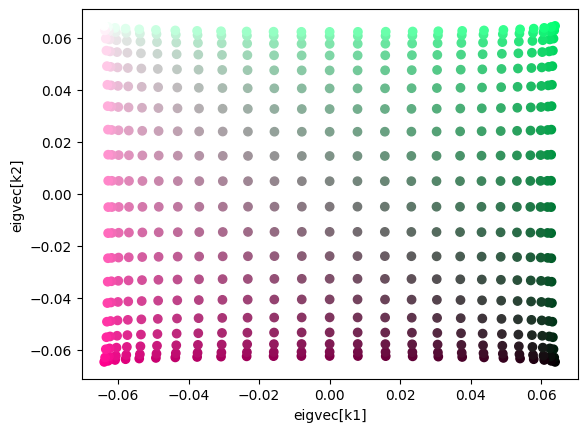

In [5]:
import matplotlib.pyplot as plt

# Sort eigenvectors by increasing eigenvalues
idx = eigenvalues.argsort()   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Assign corresponding eigenvectors to k1 and k2
k1 = eigenvectors[:,1]
k2 = eigenvectors[:,2]

# Normalize the colors to [0, 1]
norm_c = c / 255
# Create the scatter plot
plt.figure()
plt.scatter(k1, k2, c=norm_c)
plt.xlabel("eigvec[k1]")
plt.ylabel("eigvec[k2]")
plt.show()

## 8.1.5

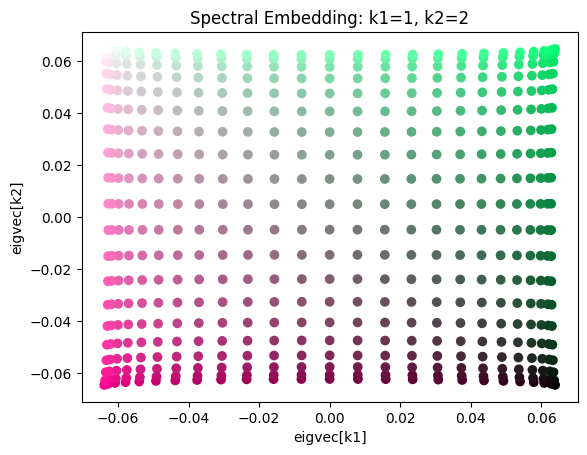

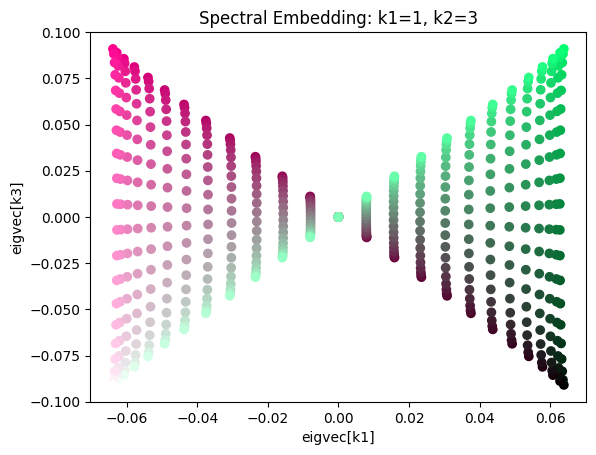

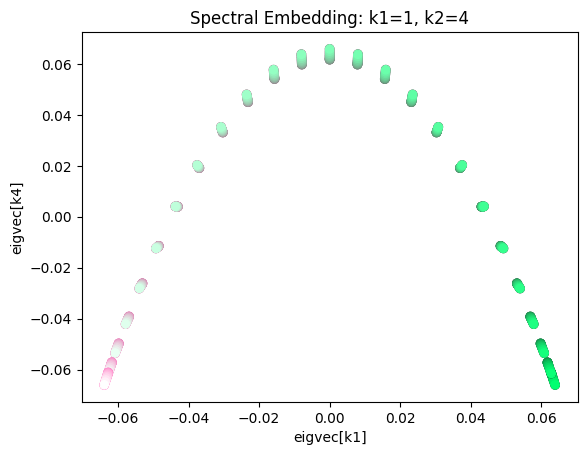

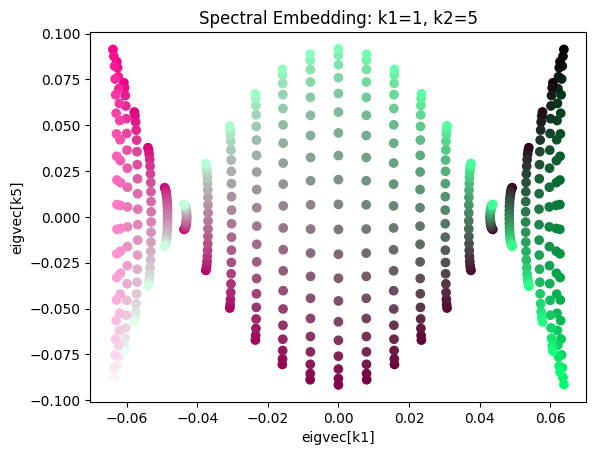

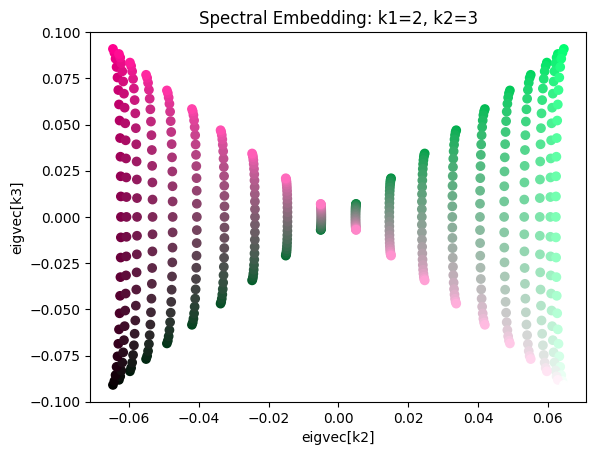

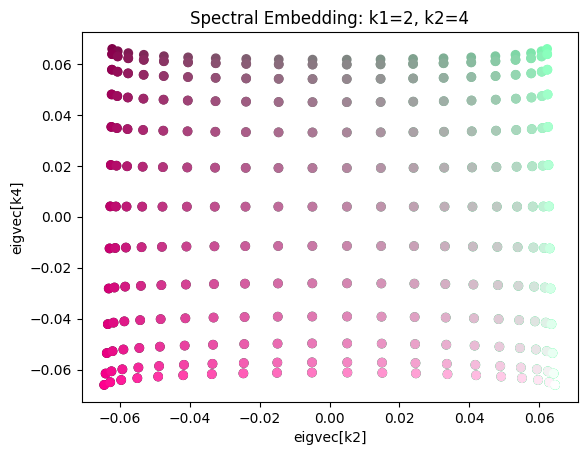

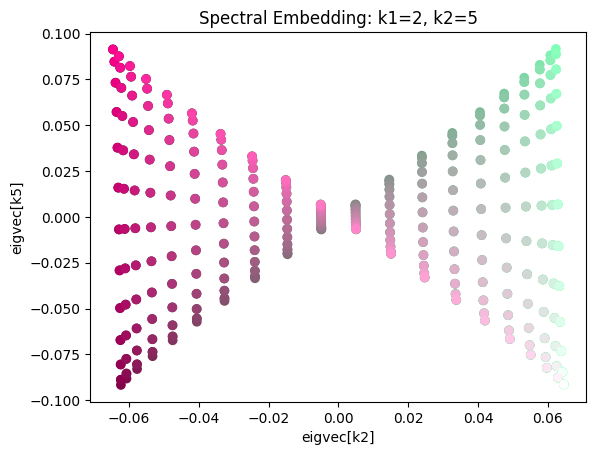

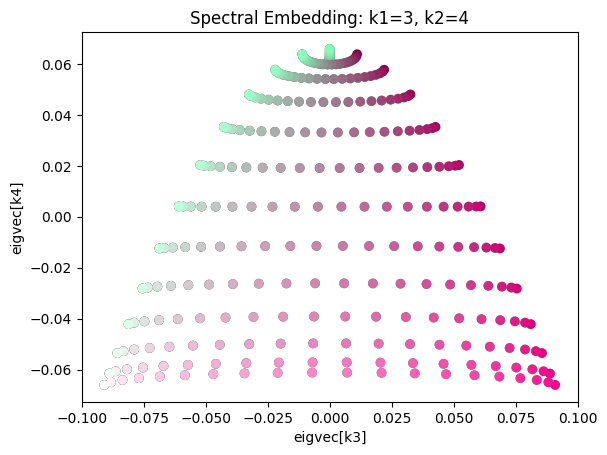

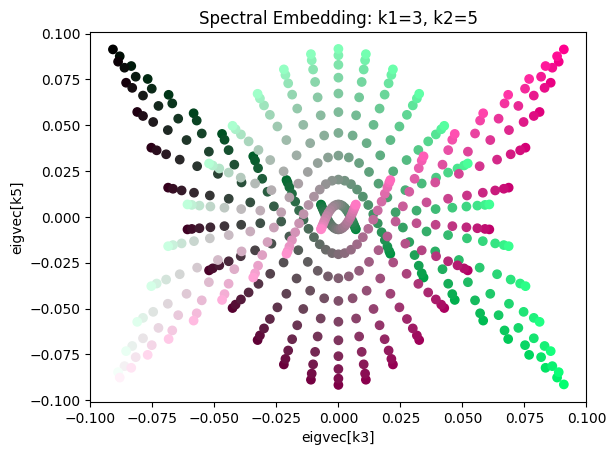

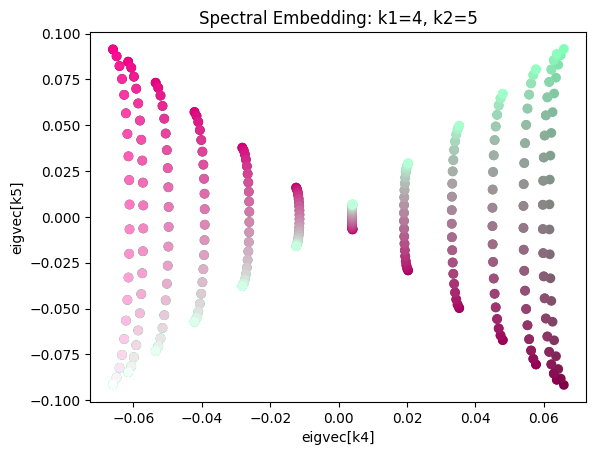

In [6]:
# Set parameters
n1 = 100
n2 = 10

# Run the previous parts of the code to get eigenvectors...

# Assess different combinations of dimensions
for dim1 in range(1, 5): # adjust range according to your needs
    for dim2 in range(dim1 + 1, 6): # avoid using the same dimension twice
        plt.figure()
        plt.scatter(eigenvectors[:,dim1], eigenvectors[:,dim2], c=norm_c)
        plt.xlabel(f"eigvec[k{dim1}]")
        plt.ylabel(f"eigvec[k{dim2}]")
        plt.title(f"Spectral Embedding: k1={dim1}, k2={dim2}")
        plt.show()


## Exercise 8.2

## 8.2.1

In [1]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('online_newspaper.db')
c = conn.cursor()

# Create tables
c.execute('''
CREATE TABLE Journalists (
    journalist_id INTEGER PRIMARY KEY,
    name TEXT,
    bio TEXT
)
''')

c.execute('''
CREATE TABLE Articles (
    article_id INTEGER PRIMARY KEY,
    journalist_id INTEGER,
    title TEXT,
    content TEXT,
    FOREIGN KEY(journalist_id) REFERENCES Journalists(journalist_id)
)
''')

c.execute('''
CREATE TABLE Categories (
    category_id INTEGER PRIMARY KEY,
    category_name TEXT,
    description TEXT
)
''')

c.execute('''
CREATE TABLE Article_Category (
    article_id INTEGER,
    category_id INTEGER,
    PRIMARY KEY (article_id, category_id),
    FOREIGN KEY(article_id) REFERENCES Articles(article_id),
    FOREIGN KEY(category_id) REFERENCES Categories(category_id)
)
''')

c.execute('''
CREATE TABLE Readers (
    reader_id INTEGER PRIMARY KEY,
    username TEXT,
    email TEXT
)
''')

c.execute('''
CREATE TABLE Comments (
    comment_id INTEGER PRIMARY KEY,
    article_id INTEGER,
    reader_id INTEGER,
    content TEXT,
    comment_date TIMESTAMP,
    FOREIGN KEY(article_id) REFERENCES Articles(article_id),
    FOREIGN KEY(reader_id) REFERENCES Readers(reader_id)
)
''')

c.execute('''
CREATE TABLE Reactions (
    reaction_id INTEGER PRIMARY KEY,
    comment_id INTEGER,
    reader_id INTEGER,
    reaction_type TEXT,
    reaction_date TIMESTAMP,
    FOREIGN KEY(comment_id) REFERENCES Comments(comment_id),
    FOREIGN KEY(reader_id) REFERENCES Readers(reader_id)
)
''')

c.execute('''
CREATE TABLE Follows (
    reader_id INTEGER,
    journalist_id INTEGER,
    PRIMARY KEY (reader_id, journalist_id),
    FOREIGN KEY(reader_id) REFERENCES Readers(reader_id),
    FOREIGN KEY(journalist_id) REFERENCES Journalists(journalist_id)
)
''')

# Commit changes and close connection
conn.commit()
conn.close()


## 8.2.2

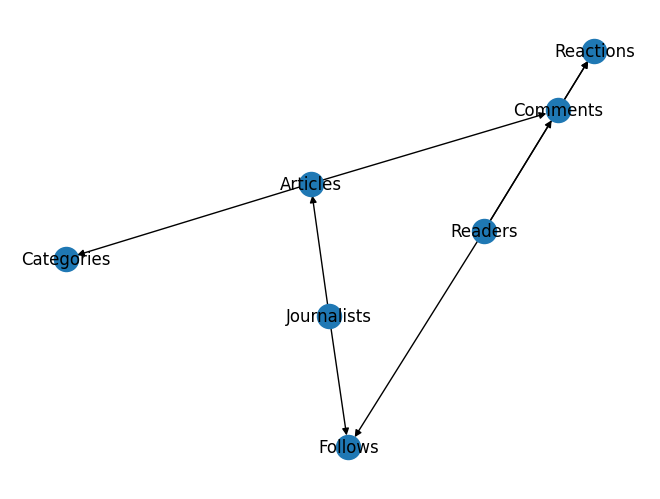

In [2]:
#pip install networkx
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Add nodes
G.add_node("Journalists")
G.add_node("Articles")
G.add_node("Categories")
G.add_node("Readers")
G.add_node("Comments")
G.add_node("Reactions")
G.add_node("Follows")

# Add edges
G.add_edge("Journalists", "Articles")
G.add_edge("Articles", "Categories")
G.add_edge("Articles", "Comments")
G.add_edge("Readers", "Comments")
G.add_edge("Comments", "Reactions")
G.add_edge("Readers", "Reactions")
G.add_edge("Readers", "Follows")
G.add_edge("Journalists", "Follows")

# Plot
nx.draw(G, with_labels=True)
plt.show()
